In [2]:
import calculate_evaluations
import importlib
import sqlite_connector

In [3]:
importlib.reload(sqlite_connector)
importlib.reload(calculate_evaluations)

dl = calculate_evaluations.data_loader(2016, 2021)
print(dl.hrefs[0])
print(f'PER = {dl.PER(2016)[0]}')
print(f'PER_H = {dl.PER_H(2018,2016)[0]}')
print(f'PRR = {dl.PRR(2016)[0]}')
print(f'PBR = {dl.PBR(2016)[0]}')
print(f'DIV_Y = {dl.DIV_Y(2016)[0]}')
print(f'ACT_Y = {dl.ACT_Y(2016)[0]}')
print(f'RET_Y = {dl.RET_Y(2016)[0]}')
print(f'CAP_Y = {dl.CAP_Y(2016)[0]}')
print(f'DEBT = {dl.DEBT(2016)[0]}')
print(f'INC_PE = {dl.INC_PE(2016)[0]}')
print(f'RET_PE = {dl.RET_PE(2016)[0]}')

3m
PER = 21.105009376953532
PER_H = 21.282003106738664
PRR = 3.54
PBR = 10.305549450549451
DIV_Y = 0.024874277938614343
ACT_Y = 0.4882987382987383
RET_Y = 0.1677326902240397
CAP_Y = 0.15347468739006684
DEBT = 0.6856950973807925
INC_PE = 52399.98252969951
RET_PE = 312401.72955974843


In [4]:
importlib.reload(sqlite_connector)
importlib.reload(calculate_evaluations)

dl = calculate_evaluations.data_loader(2016, 2021)
print(dl.hrefs[0])

print(f'1yr_change = {dl.YR_change(2016, years=1)[0]}')
print(f'2yr_change = {dl.YR_change(2016, years=2)[0]}')
print(f'3yr_change = {dl.YR_change(2016, years=3)[0]}')

print(f'ret_change1 = {dl.RET_change(2016, years=1)[0]}')
print(f'ret_change2 = {dl.RET_change(2016, years=2)[0]}')
print(f'ret_change3 = {dl.RET_change(2016, years=3)[0]}')

3m
1yr_change = 1.1735416645685839
2yr_change = 0.9969201131009823
3yr_change = 0.972558162312429
ret_change1 = 0.9214987242668904
ret_change2 = 1.0005941770647653
ret_change3 = 1.0008388382090805


In [5]:
importlib.reload(sqlite_connector)
importlib.reload(calculate_evaluations)

dl = calculate_evaluations.data_loader(2016, 2021)

hrefs, X, y = dl.create_datasets(2017, 2019, past=1, future=2)
print(len(hrefs))
print(X.shape)
print(y.shape)

print(hrefs[327])
print(X[327])
print(y[327])

(290, 13)
(290,)
(528, 13)
(528,)
(601, 13)
(601,)
601
(601, 13)
(601,)
bollore
[4.31087660e+01 2.82526767e+01 4.40000000e-01 3.59201503e-01
 1.72586708e-02 8.33244690e-03 1.02067408e-02 4.23965794e-03
 4.91186924e-01 2.90123457e+03 2.84246914e+05 7.81067152e-01
 1.25642565e+00]
1.0471247394023628


In [6]:
different_companies = list(set(hrefs))
different_companies.sort()
print(different_companies[30:40])

['automatic_data_processing', 'bae_systems', 'baic_motor_corporation', 'basf', 'bayer', 'baywa', 'baywa_namensaktie', 'becton_dickinson', 'best_buy', 'bhp_group_ltd']


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [8]:
from sklearn.preprocessing import StandardScaler
import numpy as np

scaler = StandardScaler().fit(X_train)
X_ts = scaler.transform(X_train)

print(np.mean(X_ts[:,0]))
print(np.std(X_ts[:,0]))
print(np.mean(X_ts[:,12]))
print(np.std(X_ts[:,12]))

-4.229421046191073e-18
0.9999999999999993
4.863834203119734e-16
0.9999999999999999


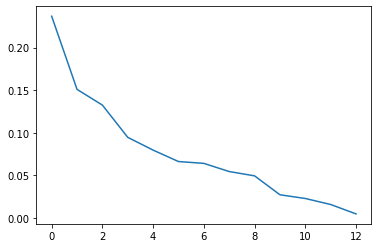

In [9]:
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt

pca = PCA().fit(X_ts)
plt.plot(np.arange(13), pca.explained_variance_ratio_)
plt.show()

pca_components = pca.components_

In [10]:
importlib.reload(calculate_evaluations)

print(pca_components.shape)

for i in range(3):
    print(f"\n{i} pca vector")
    comp = pca_components[i]
    idxs = np.argsort(comp)
    for i in idxs[::-1]:
        if np.abs(comp[i]) > 0.32:
            print(f"value in feature direction [{calculate_evaluations.FEATURE_NAMES[i]}] = {comp[i]}")

(13, 13)

0 pca vector
value in feature direction [PRR] = 0.4413054747160516
value in feature direction [CAP_Y] = 0.4374543515008214
value in feature direction [RET_Y] = 0.4174015997669654
value in feature direction [PBR] = 0.36174847716764463
value in feature direction [INC_PE] = 0.3576713130483331
value in feature direction [ACT_Y] = 0.3431137870011909

1 pca vector
value in feature direction [PBR] = 0.47873755489705766
value in feature direction [ACT_Y] = 0.4691285139246364
value in feature direction [DEBT] = 0.40693247246605385
value in feature direction [INC_PE] = -0.3635090529930875

2 pca vector
value in feature direction [PER_H] = 0.5078972881181644
value in feature direction [YR_change] = 0.39949928808330193
value in feature direction [PER] = 0.3256407820259576
value in feature direction [DIV_Y] = -0.4449551015153638


(2, 13)


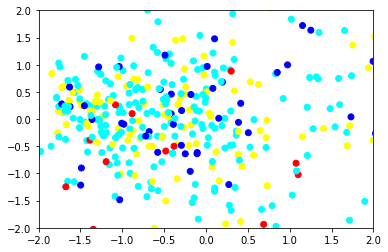

In [11]:
pca = PCA(n_components=2).fit(X_ts)
print(pca.components_.shape)

X_tsp = pca.transform(X_ts)
colors = np.empty((len(y_train), 3))
colors[y_train < 0.75]                      = [1,0,0]
colors[(y_train >= 0.75) & (y_train < 1)]   = [1,1,0]
colors[(y_train >= 1) & (y_train < 1.25)]   = [0,1,1]
colors[y_train >= 1.25]                     = [0,0,1]


#plt.figure(figsize=(10, 10))
plt.scatter(X_tsp[:,0], X_tsp[:,1], c=colors)
plt.xlim([-2,2])
plt.ylim([-2,2])
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression

print(np.mean(y_train))
print(np.std(y_train))
reg = LinearRegression().fit(X_tsp, y_train)

1.0939665317384886
0.51767834951119


(256, 2)
[[-2.         -2.        ]
 [-1.73333333 -2.        ]
 [-1.46666667 -2.        ]
 [-1.2        -2.        ]
 [-0.93333333 -2.        ]]
(16, 16)
[[1.07949001 1.07966105 1.07983209 1.08000313 1.08017417 1.08034521
  1.08051625 1.08068729 1.08085833 1.08102936 1.0812004  1.08137144
  1.08154248 1.08171352 1.08188456 1.0820556 ]
 [1.08124917 1.08142021 1.08159125 1.08176229 1.08193333 1.08210437
  1.08227541 1.08244645 1.08261749 1.08278853 1.08295957 1.08313061
  1.08330165 1.08347269 1.08364372 1.08381476]]


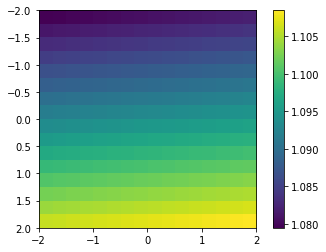

In [13]:
X_spa = np.linspace(-2,2,16)
Y_spa = np.linspace(-2,2,16)
X_grid, Y_grid = np.meshgrid(X_spa, Y_spa)
grid = np.vstack((X_grid.flatten(), Y_grid.flatten())).T
print(grid.shape)
print(grid[:5])

predictions = reg.predict(grid).reshape(16,16)
print(predictions.shape)
print(predictions[:2])

plt.imshow(predictions, extent=[-2,2,2,-2])
plt.colorbar()
plt.show()

In [14]:
from sklearn.svm import SVR

svr = SVR(epsilon=0.2).fit(X_tsp, y_train)

(16, 16)


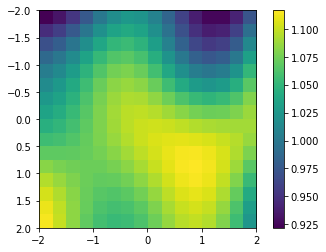

In [15]:
predictions = svr.predict(grid).reshape(16,16)
print(predictions.shape)

plt.imshow(predictions, extent=[-2,2,2,-2])
plt.colorbar()
plt.show()

In [16]:
from sklearn.model_selection import cross_val_score

score = cross_val_score(SVR(), X_tsp, y_train, cv=5)
print(score)
svr.score(X_tsp, y_train)

[-0.04037648 -0.04565943 -0.01553417 -0.04932427 -0.02351338]


0.0033543895147261082

In [17]:
from sklearn.inspection import permutation_importance

svr_f = SVR().fit(X_ts, y_train)
print(svr_f.score(X_ts, y_train))
r = permutation_importance(svr_f, X_ts, y_train, n_repeats=30, random_state=42)

0.05742379434417455


In [18]:
for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{i:2} - {calculate_evaluations.FEATURE_NAMES[i]:<16}"
    f"{r.importances_mean[i]:.3f}"
    f" +/- {r.importances_std[i]:.3f}")

 4 - DIV_Y           0.032 +/- 0.012
12 - RET_change      0.026 +/- 0.005
11 - YR_change       0.025 +/- 0.008
 8 - DEBT            0.015 +/- 0.003
 2 - PRR             0.015 +/- 0.003
10 - RET_PE          0.014 +/- 0.004
 1 - PER_H           0.011 +/- 0.004
 5 - ACT_Y           0.007 +/- 0.003
 9 - INC_PE          0.007 +/- 0.003
 7 - CAP_Y           0.006 +/- 0.003
 3 - PBR             0.006 +/- 0.002
 6 - RET_Y           0.003 +/- 0.010
 0 - PER             0.002 +/- 0.002


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

parameters = {
    'pca__n_components':np.arange(2,9), 
    'svr__C':np.linspace(0.1,10,8),
    'svr__epsilon': np.linspace(0,0.5,8)
}
pipe = Pipeline([('pca', PCA()), ('svr', SVR())])

clf = GridSearchCV(pipe, parameters, n_jobs=-1)
clf.fit(X_ts, y_train)

GridSearchCV(estimator=Pipeline(steps=[('pca', PCA()), ('svr', SVR())]),
             n_jobs=-1,
             param_grid={'pca__n_components': array([2, 3, 4, 5, 6, 7, 8]),
                         'svr__C': array([ 0.1       ,  1.51428571,  2.92857143,  4.34285714,  5.75714286,
        7.17142857,  8.58571429, 10.        ]),
                         'svr__epsilon': array([0.        , 0.07142857, 0.14285714, 0.21428571, 0.28571429,
       0.35714286, 0.42857143, 0.5       ])})

In [20]:
res = clf.cv_results_

mean_s = res['mean_test_score']
print(mean_s.shape)
print(clf.best_score_)
print(clf.best_params_)

(448,)
0.07469919238855802
{'pca__n_components': 7, 'svr__C': 0.1, 'svr__epsilon': 0.0}


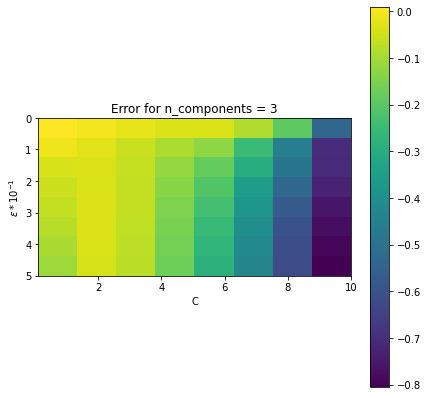

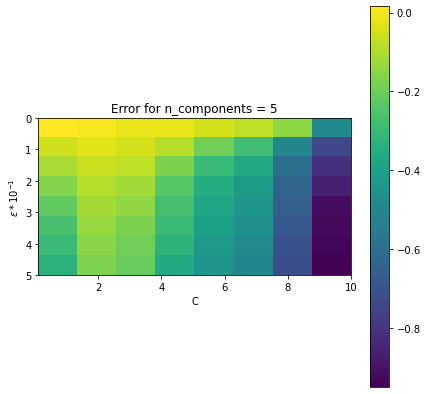

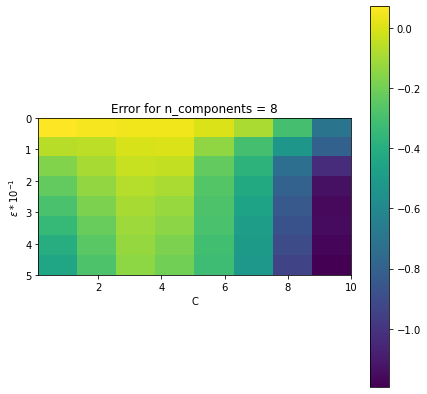

In [21]:
for n in [3,5,8]:
    selection = res['param_pca__n_components'] == n
    scores = mean_s[selection].reshape(8,8)
    plt.figure(figsize=(7, 7))
    plt.imshow(scores, extent=[0.1,10,5,0])
    plt.colorbar()
    plt.xlabel('C')
    plt.ylabel('$\epsilon * 10^{-1}$')
    plt.title(f'Error for n_components = {n}')
    plt.show()


In [22]:
from sklearn.metrics import mean_squared_error

best_m = clf.best_estimator_

pred_train = best_m.predict(X_train)
print((pred_train - y_train)[:10] * 100)
X_tests = scaler.transform(X_test)
print(mean_squared_error(y_train, pred_train))
print(mean_squared_error(y_test, best_m.predict(X_tests)))

[-2.85818701e+00  1.38753201e+01 -1.79792163e+01 -1.10281681e-02
 -2.36919214e+00  2.85576653e-01  6.80431286e+00  3.22781893e+01
  1.21826520e+01  3.57081734e+00]
0.26801058816211487
0.031169616058078043


In [23]:
test_scorerX = np.ones((2,13))
test_scorerY = np.array([1.3, 0.95])
pred = best_m.predict(test_scorerX)
print(pred)
print(mean_squared_error(test_scorerY, pred))

[1.00122731 1.00122731]
0.04594467848704988


In [24]:
import ml_util

In [25]:
for i in r.importances_mean.argsort()[::-1]:
#    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
    print(f"{i:2} - {calculate_evaluations.FEATURE_NAMES[i]:<16}"
    f"{r.importances_mean[i]:.3f}"
    f" +/- {r.importances_std[i]:.3f}")

 4 - DIV_Y           0.032 +/- 0.012
12 - RET_change      0.026 +/- 0.005
11 - YR_change       0.025 +/- 0.008
 8 - DEBT            0.015 +/- 0.003
 2 - PRR             0.015 +/- 0.003
10 - RET_PE          0.014 +/- 0.004
 1 - PER_H           0.011 +/- 0.004
 5 - ACT_Y           0.007 +/- 0.003
 9 - INC_PE          0.007 +/- 0.003
 7 - CAP_Y           0.006 +/- 0.003
 3 - PBR             0.006 +/- 0.002
 6 - RET_Y           0.003 +/- 0.010
 0 - PER             0.002 +/- 0.002


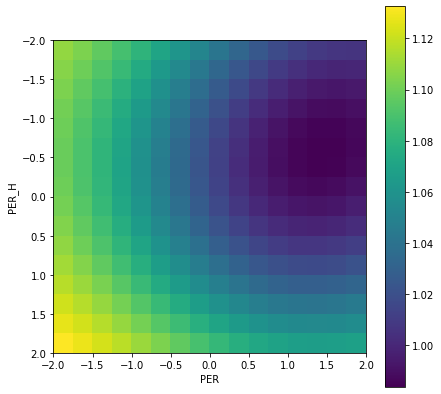

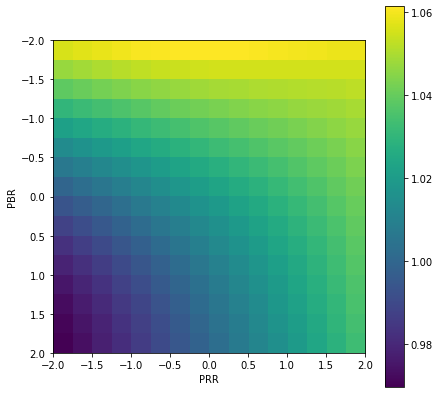

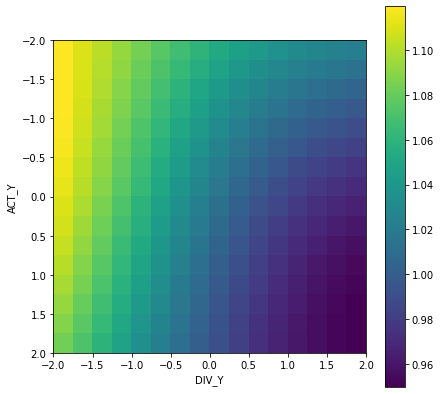

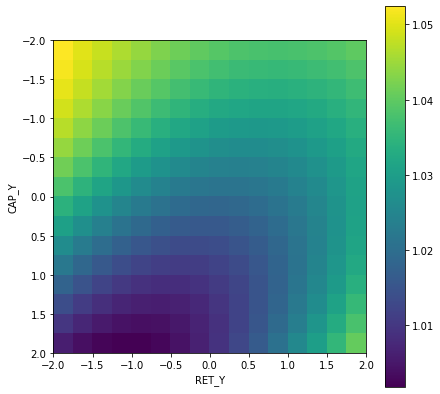

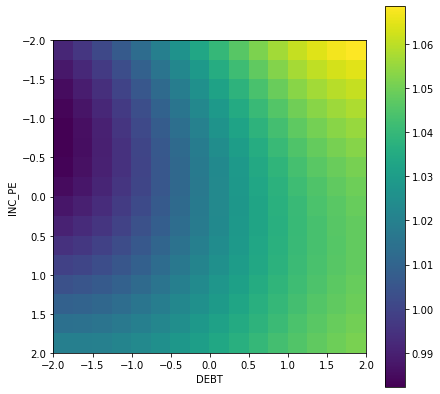

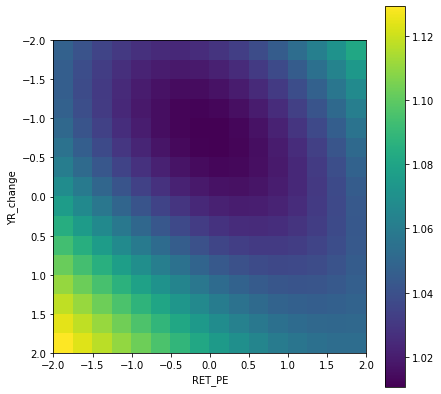

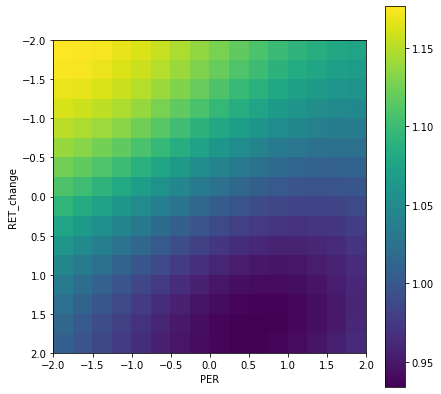

In [26]:
importlib.reload(ml_util)
for i in range(6):
    ml_util.plot_feature_pair(best_m, 2 * i, 2 * i + 1)
ml_util.plot_feature_pair(best_m, 0, 12)

In [30]:
grid = np.zeros((16,13))
grid[:,4] = np.linspace(-2, 2, num = 16)
print(best_m.predict(grid))

[1.11212838 1.09974569 1.08704782 1.07422509 1.06146853 1.04896477
 1.03689119 1.02541141 1.01467141 1.00479628 0.99588776 0.98802262
 0.98125193 0.97560118 0.97107121 0.96763989]


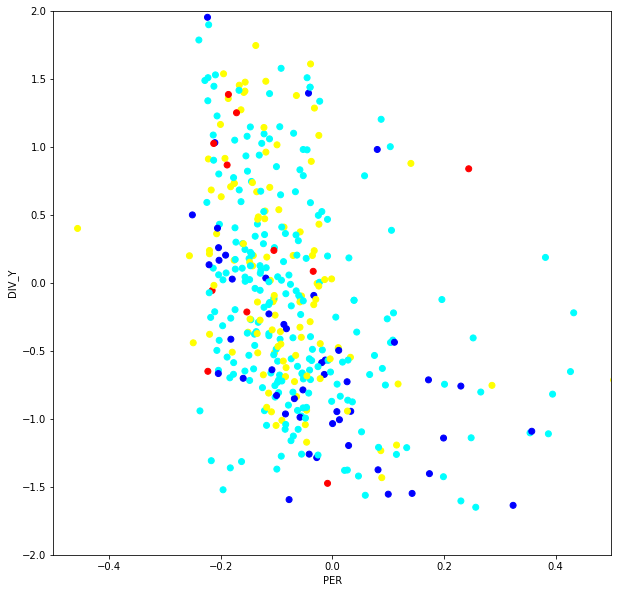

In [31]:
plt.figure(figsize=(10, 10))
plt.scatter(X_ts[:,0], X_ts[:,4], c=colors)
plt.xlabel('PER')
plt.ylabel('DIV_Y')
plt.xlim([-0.5,0.5])
plt.ylim([-2,2])
plt.show()